In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
telco_data = pd.read_csv('/content/drive/MyDrive/DA/Telco-Customer-Churn.csv')
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


total number  of rows and column in the telco_data

In [ ]:
telco_data.shape

(7043, 21)

column names available in the telco_data

In [ ]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

check telco_datatype of each column

In [ ]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

check the descriptive statistics of numeric variables
standard deviation - Standard Deviation is a measure which shows how much variation (such as spread, dispersion, spread,) from the mean exists.
25th percentile (25%), median (50% or 2nd quartile), 75th percentile (75%),

In [ ]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.0, 'Count of target variable per category')

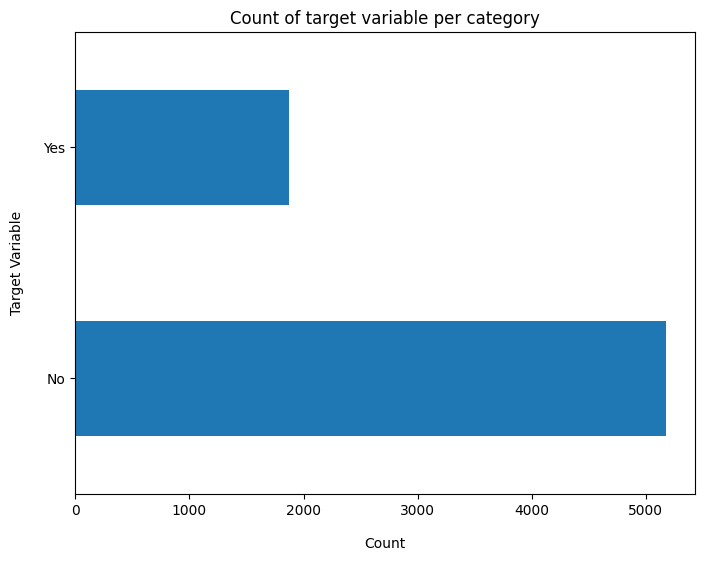

In [ ]:
telco_data['Churn'].value_counts().plot(kind='barh', figsize=(8,6)) #calculates the frequency of each unique value in the 'Churn' column.
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14) #labelpad is used to specify the distance of the labels from the axes.
plt.title("Count of target variable per category")


In [ ]:
100*telco_data['Churn'].value_counts()/len(telco_data['Churn'])
# calculates the percentage distribution of the values in the 'Churn' column of the telco_data
# there are two unique values in the 'Churn' column ('Yes' and 'No'), and 'Yes' appears in 20% of the data and 'No' appears in 80% of the data

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

telco_data is highly imbalanced ratio = 73.27

In [ ]:
telco_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
# info() method in pandas is used to print summary of a DataFrame
#  Setting verbose=True provides a more detailed output
 telco_data.info(verbose=True)

IndentationError: unexpected indent (<ipython-input-10-1db553d48f20>, line 3)

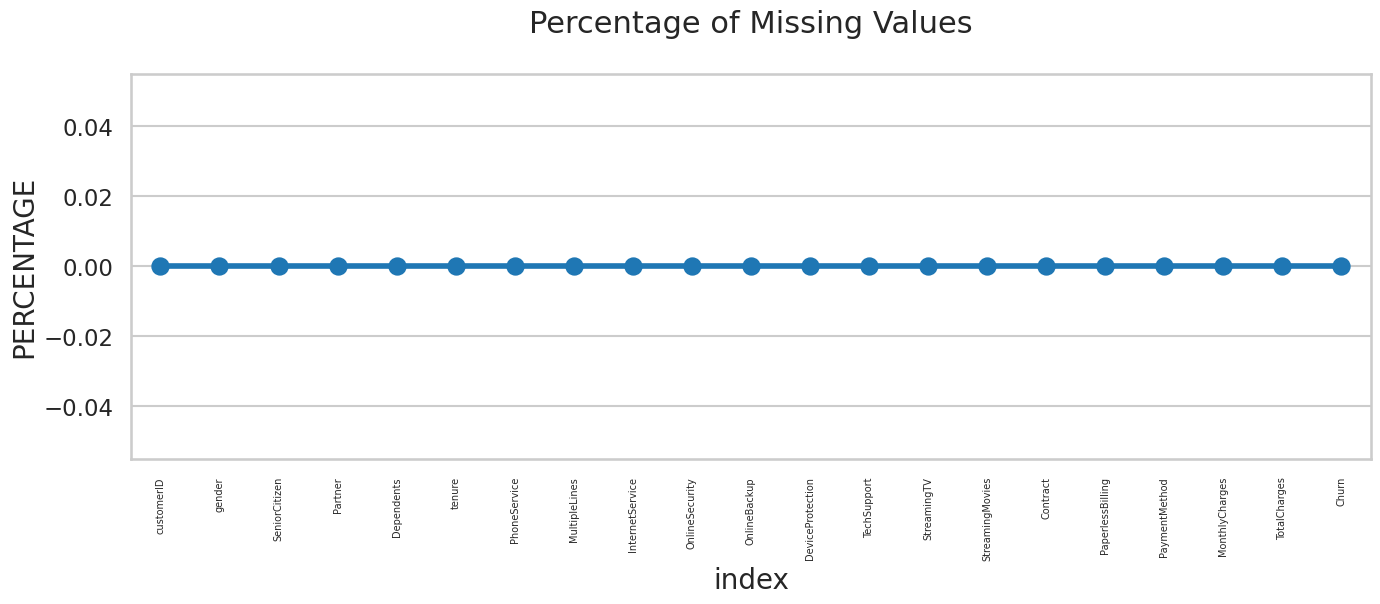

In [61]:
missing = pd.DataFrame((telco_data.isnull().sum())*100/telco_data.shape[0]).reset_index()
plt.figure(figsize =(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

**Data Cleaning**

creating copy of data for data manupulation and processing

In [ ]:
telco_data_new=telco_data.copy()

converting totalcharges column data type object to numeric
identifying how many values are missing value

In [ ]:
telco_data_new.TotalCharges=pd.to_numeric(telco_data_new.TotalCharges, errors='coerce')
# errors='coerce' is an argument that instructs pandas to coerce invalid parsing to NaN (Not a Number) instead of raising an error.
telco_data_new.isnull().sum()

check the records which having the missing values

In [ ]:
telco_data_new.loc[telco_data_new['TotalCharges'].isnull()==True]

**Missing Value Treatement**

the total percentage of these records compared to total dataset is very low i.e.0.15% it is safe to ignore them for further processing

In [ ]:
# removes rows containing any missing values from the telco_data_new
# how='any' specifies that rows containing any missing values will be dropped
# inplace=True specifies that the operation should be done in place, meaning it modifies the original DataFrame telco_data_new instead of returning a new DataFrame.
telco_data_new.dropna(how='any',inplace=True)

divide customers into bins based on tenure e.g tenure <12 months assign a tenure group if 1-12, for tenure between 1 to 2 yrs, tenure group of 13-14 so on..

In [ ]:
#get max tenure
print(telco_data_new['tenure'].max())

In [ ]:
#group the tenure in bins of 12 months
#  generates labels like '1-12', '13-24', '25-36', ..., '61-72', indicating 12-month intervals.
# pd.cut() is a pandas function used to segment and sort data values into bins.

labels=["{0}-{1}".format(i,i+11)for i in range(1,72,12)]
telco_data_new['tenure_group']=pd.cut(telco_data_new.tenure, range(1,80,12), right=False,labels=labels)

In [ ]:
telco_data_new['tenure_group'].value_counts()

remove the columns that are not required for processing

In [ ]:
telco_data_new.drop(columns=['customerID','tenure'], axis=1, inplace=True)
telco_data_new.head()


**Data Exploration **
plot distribution of individual predictors by churn


In [ ]:
#  iterates over each predictor variable (excluding 'Churn', 'TotalCharges', and 'MonthlyCharges') in the DataFrame
for i , predictor in enumerate(telco_data_new.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
  plt.figure()  #creates a new figure for each count plot.
  sns.countplot(data=telco_data_new, x=predictor, hue='Churn') #hue='Churn' specifies the variable to be used for coloring the bars

convert the target variable 'Churn' in binary numeric variable i.e. yes=1 and no=0

In [ ]:
telco_data_new['Churn']= np.where(telco_data_new.Churn == 'Yes',1,0) #(1 for 'Yes', 0 for 'No').

In [ ]:
telco_data_new.head()

convert all categorical variables into dummy variables

In [ ]:
telco_data_dumies = pd.get_dummies(telco_data_new)
telco_data_dumies.head()
# telco_data_dummies, contains the original columns along with new columns representing each category of the original categorical variables using binary indicators (0 or 1).

relationship between monthly charges and total charges

In [ ]:
sns.lmplot(data=telco_data_dumies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
# create scatter plots with a linear regression line

as we can see total charges increases as monthly charges increase as expected

Churn by monthly charges and total charges

In [ ]:
#  creates a kernel density estimate (KDE) plot to visualize the distribution of monthly charges for customers who churned and customers who didn't churn.
Mth = sns.kdeplot(telco_data_dumies.MonthlyCharges[(telco_data_dumies["Churn"]==0)], color="Red", shade= True)
Mth = sns.kdeplot(telco_data_dumies.MonthlyCharges[(telco_data_dumies["Churn"]==1)], ax=Mth, color="Blue", shade=True)
Mth.legend(["No Churn","Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Insight - Churn is high when Monthly charges are high

In [ ]:

# (KDE) plot to visualize the distribution of total charges for customers who churned and customers who didn't churn.
Tot = sns.kdeplot(telco_data_dumies.TotalCharges[(telco_data_dumies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dumies.TotalCharges[(telco_data_dumies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

** Build a corelation of all predictors with 'Churn' **

In [ ]:
plt.figure(figsize=(20,8))
telco_data_dumies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dumies.corr(), cmap="Paired") #cmap="Paired" specifies the color map to be used for the heatmap.

Bivariate Analysis

In [65]:
new_df1_target0=telco_data_new.loc[telco_data_new["Churn"]==0]
new_df1_target1=telco_data_new.loc[telco_data_new["Churn"]==1]


In [66]:
def uniplot(df,col,title,hue):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20  #set the size and padding for the axes labels and title.
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data = hue) #creates a pandas Series from the hue parameter.
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique()) #determine the width of the figure based on the number of unique values in the col column and the hue parameter.
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    # plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()





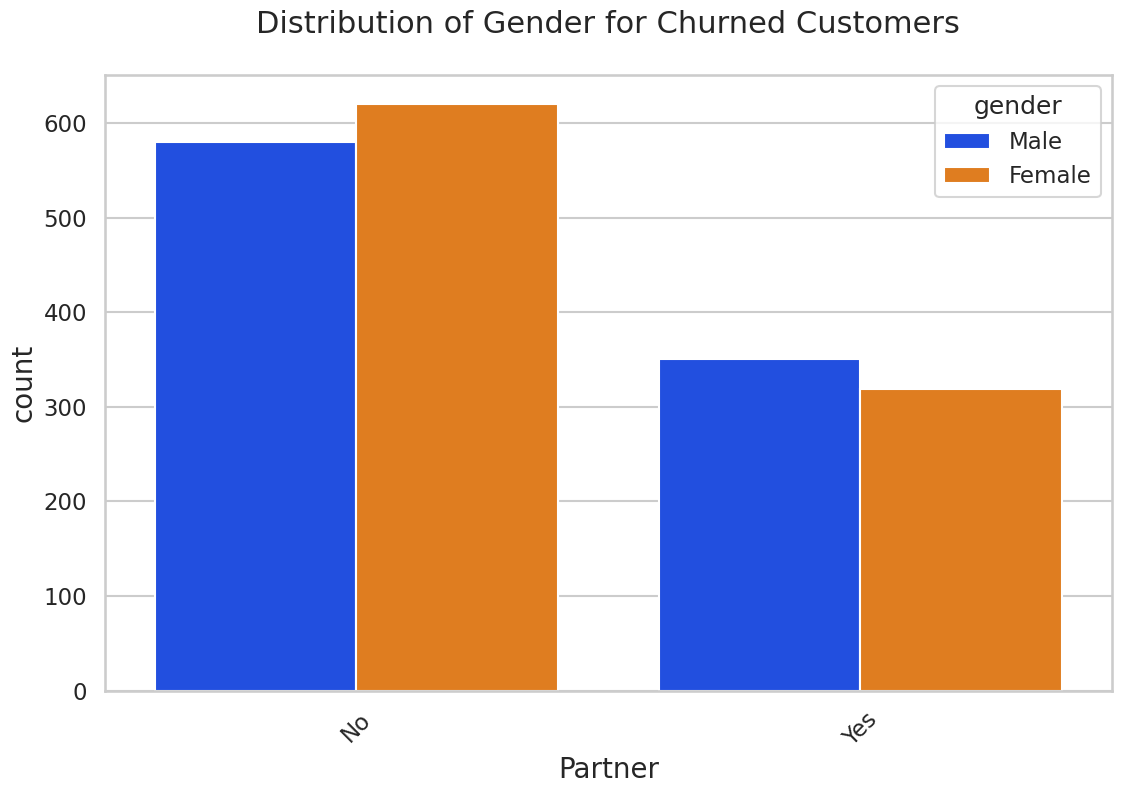

In [75]:
# uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')



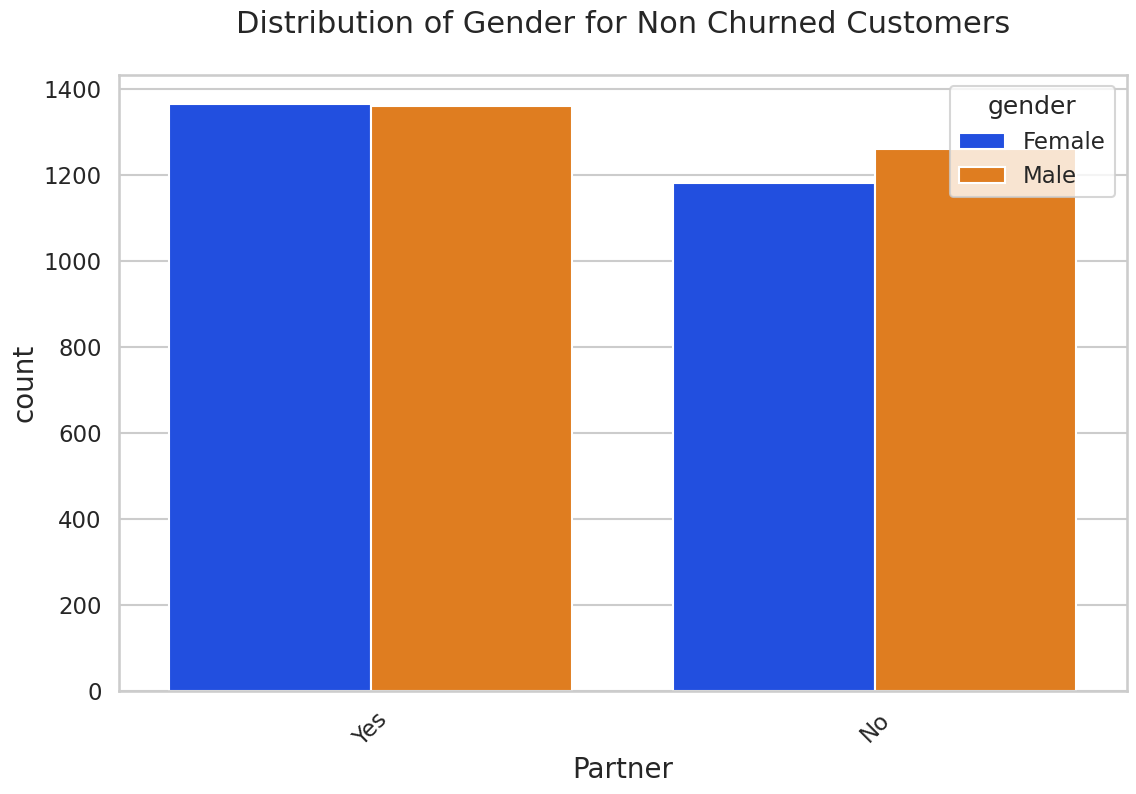

In [68]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')


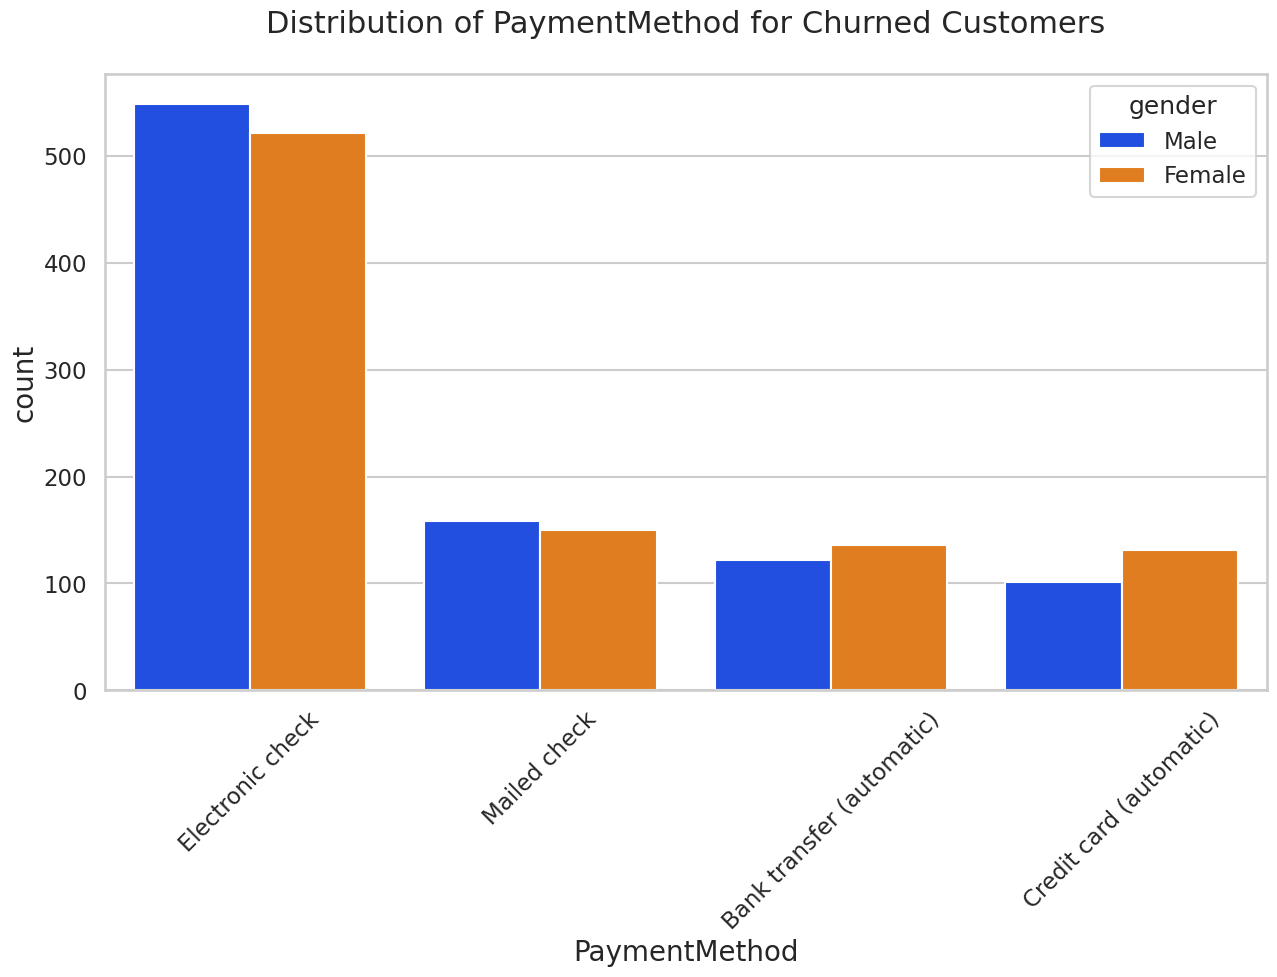

In [69]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')


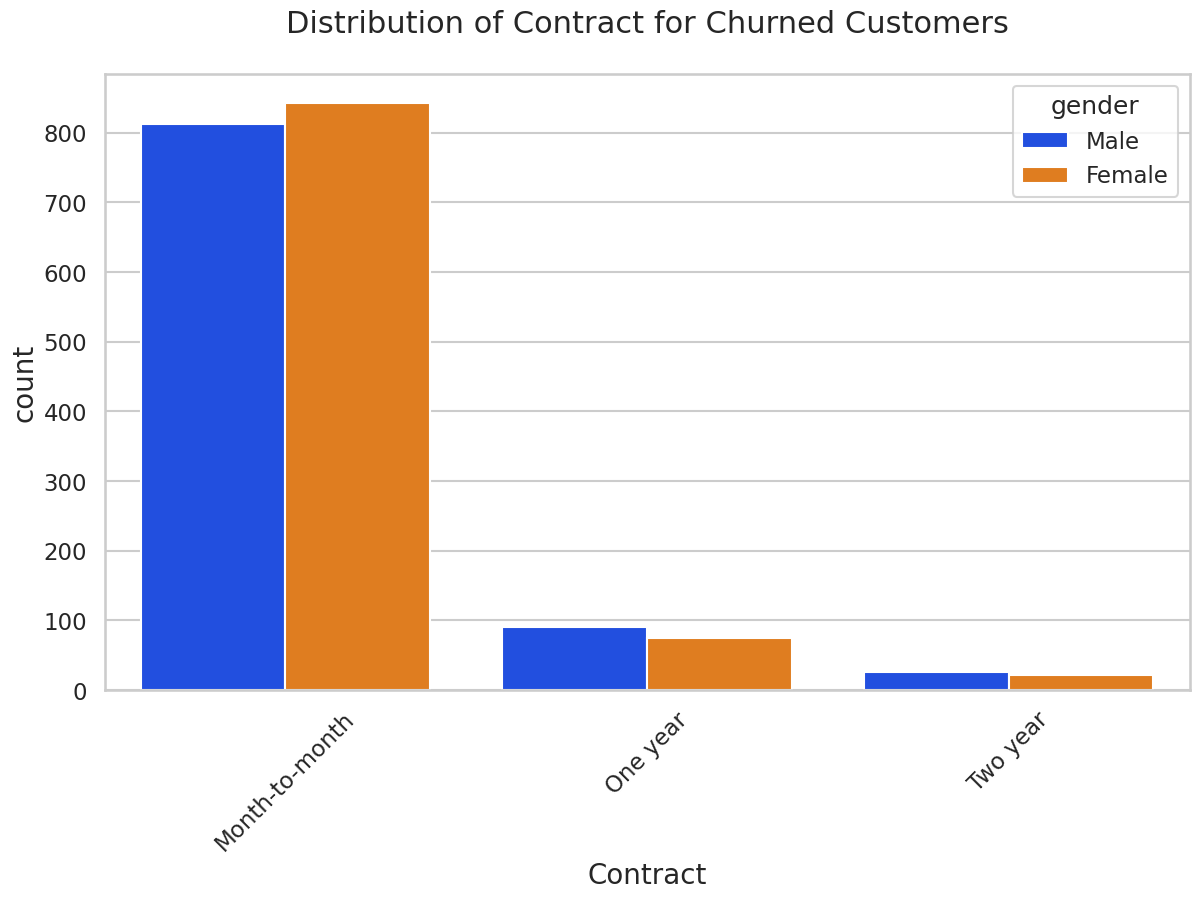

In [70]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')


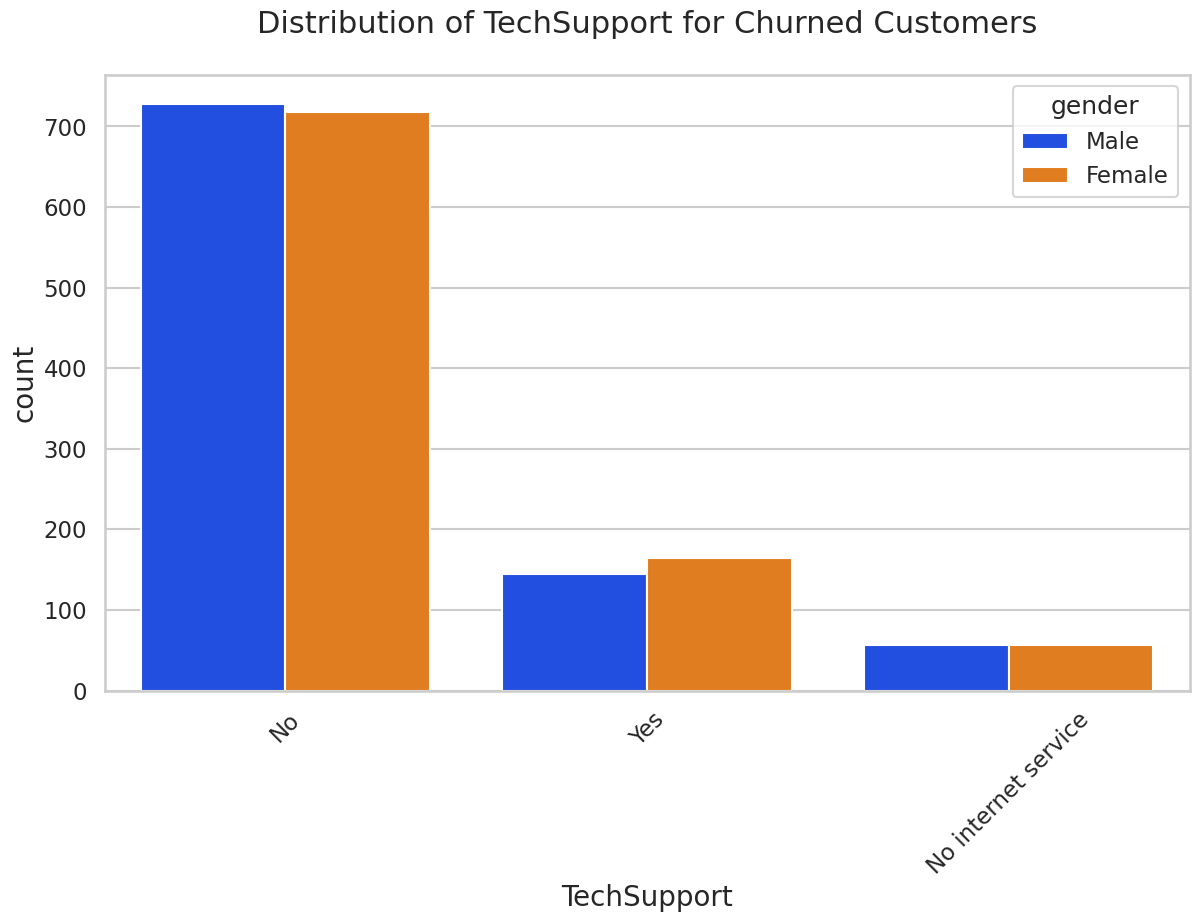

In [71]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


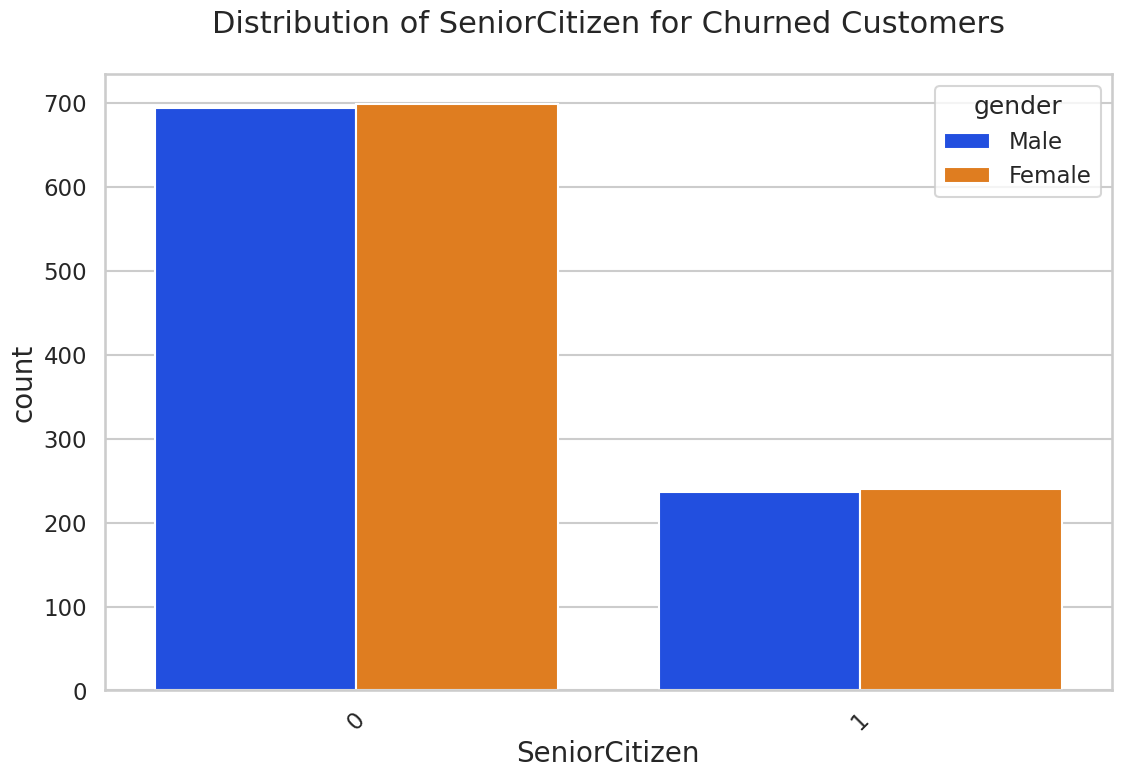

In [72]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')


In [ ]:

# CONCLUSION
# These are some of the quick insights

# Electronic check medium are the highest churners
# Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
# No Online security, No Tech Support category are high churners
# Non senior Citizens are high churners
# Note: There could be many more such insights, so take this as an assignment and try to get more insights :)